In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scanpy as sc
import anndata as ad
import torch

Loading the dataset

In [2]:
os.chdir("../data/immune_dictionary")
cell_types = ["B_cell", "T_cell_CD4", "T_cell_CD8"]
dirs = [f"{i}_ref_data.h5ad" for i in cell_types]
for i, dir in enumerate(dirs):
    adata = sc.read(dir)
    if i == 0:
        merged = adata
        continue
    merged = sc.concat([merged, adata], join="outer")
merged.var["gene_symbol"] = adata.var.index
merged.obs["condition"] = merged.obs["sample"]

In [3]:
merged

AnnData object with n_obs × n_vars = 25486 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'channel', 'nCount_HTO', 'nFeature_HTO', 'MULTI_ID', 'MULTI_classification', 'percent_mito', 'RNA_snn_res.1.5', 'seurat_clusters', 'cluster_manual', 'celltype', 'channel_hashtag', 'sample', 'rep', 'condition'
    var: 'gene_symbol'
    obsm: 'X_pca', 'X_tsne'

Preprocessing

In [3]:
#identify mitochondrial genes
merged.var["mt"] = merged.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(merged, qc_vars=["mt"], inplace=True)

/home/yalda_y/mambaforge/envs/state_transition/lib/python3.10/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


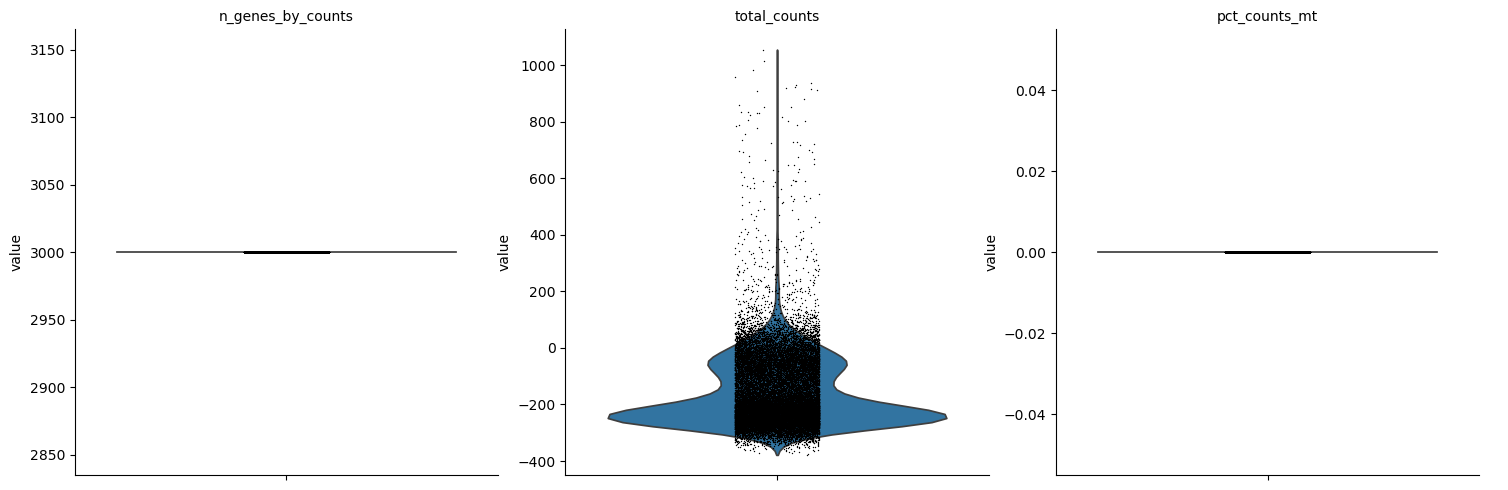

In [4]:
#Why are there negative total counts?!
sc.pl.violin(
    merged,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    multi_panel=True 
      )

In [6]:
#not for now
#sc.pp.filter_cells(merged, min_counts=100)
#sc.pp.filter_genes(merged, min_cells=10)

In [4]:
#filter CD8 T cells
T_cell_CD8 = merged[merged.obs["celltype"]=="T_cell_CD8"]

In [5]:
T_cell_CD8

View of AnnData object with n_obs × n_vars = 8700 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'channel', 'nCount_HTO', 'nFeature_HTO', 'MULTI_ID', 'MULTI_classification', 'percent_mito', 'RNA_snn_res.1.5', 'seurat_clusters', 'cluster_manual', 'celltype', 'channel_hashtag', 'sample', 'rep', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'X_pca', 'X_tsne'

In [6]:
#filter CD4 T cells
T_cell_CD4 = merged[merged.obs["celltype"]=="T_cell_CD4"]

In [7]:
T_cell_CD4

View of AnnData object with n_obs × n_vars = 8700 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'channel', 'nCount_HTO', 'nFeature_HTO', 'MULTI_ID', 'MULTI_classification', 'percent_mito', 'RNA_snn_res.1.5', 'seurat_clusters', 'cluster_manual', 'celltype', 'channel_hashtag', 'sample', 'rep', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'X_pca', 'X_tsne'

In [8]:
#filter B cells
B_cell = merged[merged.obs["celltype"]=="B_cell"]

In [9]:
B_cell

View of AnnData object with n_obs × n_vars = 8086 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'channel', 'nCount_HTO', 'nFeature_HTO', 'MULTI_ID', 'MULTI_classification', 'percent_mito', 'RNA_snn_res.1.5', 'seurat_clusters', 'cluster_manual', 'celltype', 'channel_hashtag', 'sample', 'rep', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'X_pca', 'X_tsne'

In [10]:
#run umap on all
sc.pp.neighbors(merged)
sc.tl.umap(merged)

/home/yalda_y/mambaforge/envs/state_transition/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#run umap on CD8
sc.pp.neighbors(T_cell_CD8)
sc.tl.umap(T_cell_CD8)

In [12]:
#run umap on CD4
sc.pp.neighbors(T_cell_CD4)
sc.tl.umap(T_cell_CD4)

In [13]:
#run umap on B_cell
sc.pp.neighbors(B_cell)
sc.tl.umap(B_cell)

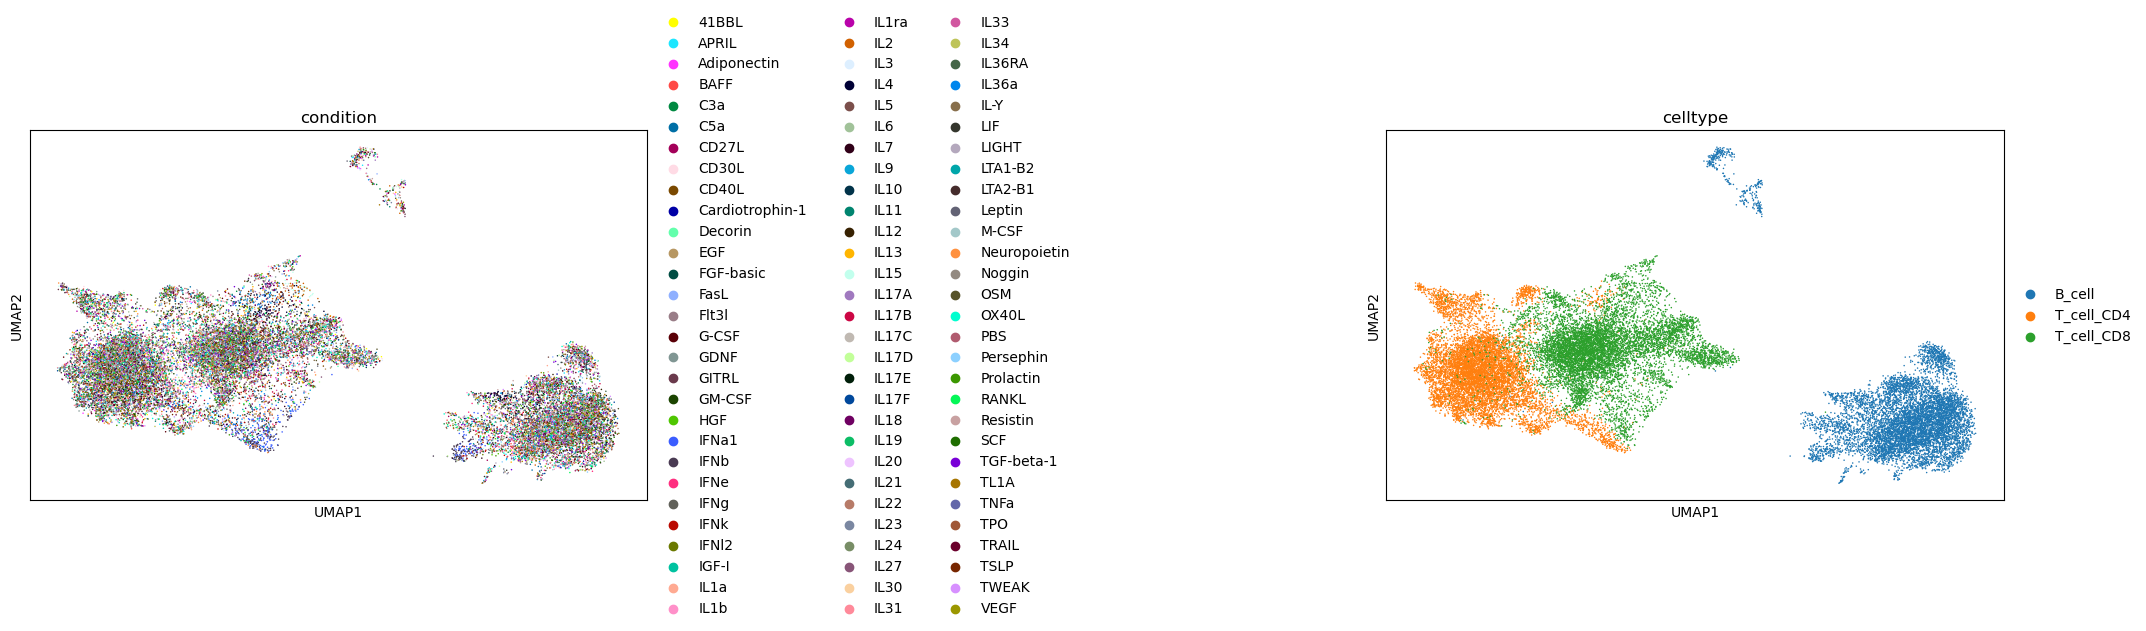

In [14]:
sc.pl.umap(merged, color=["condition", "celltype"], wspace=1)

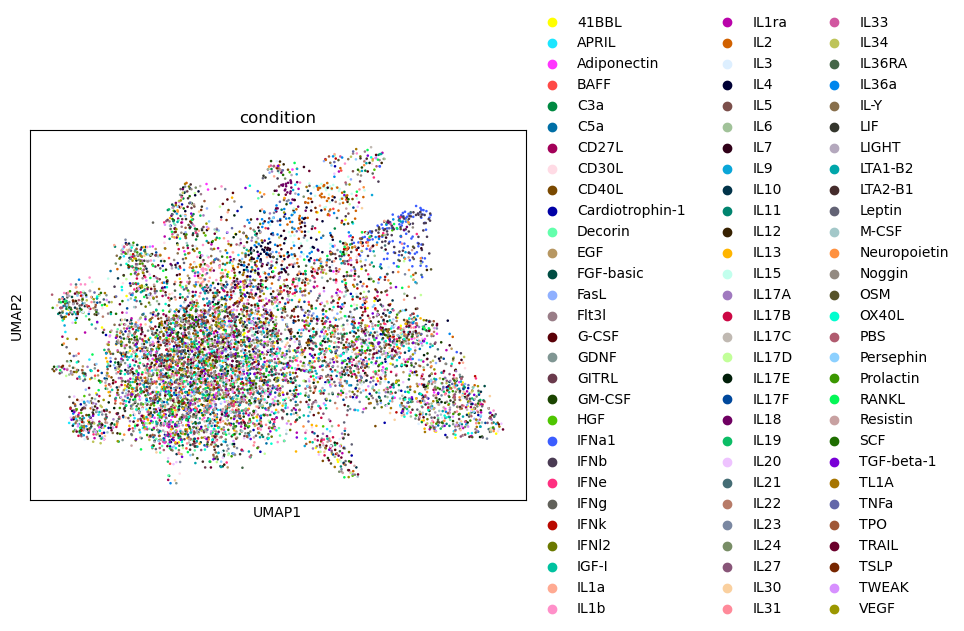

In [16]:
sc.pl.umap(T_cell_CD8, color="condition")

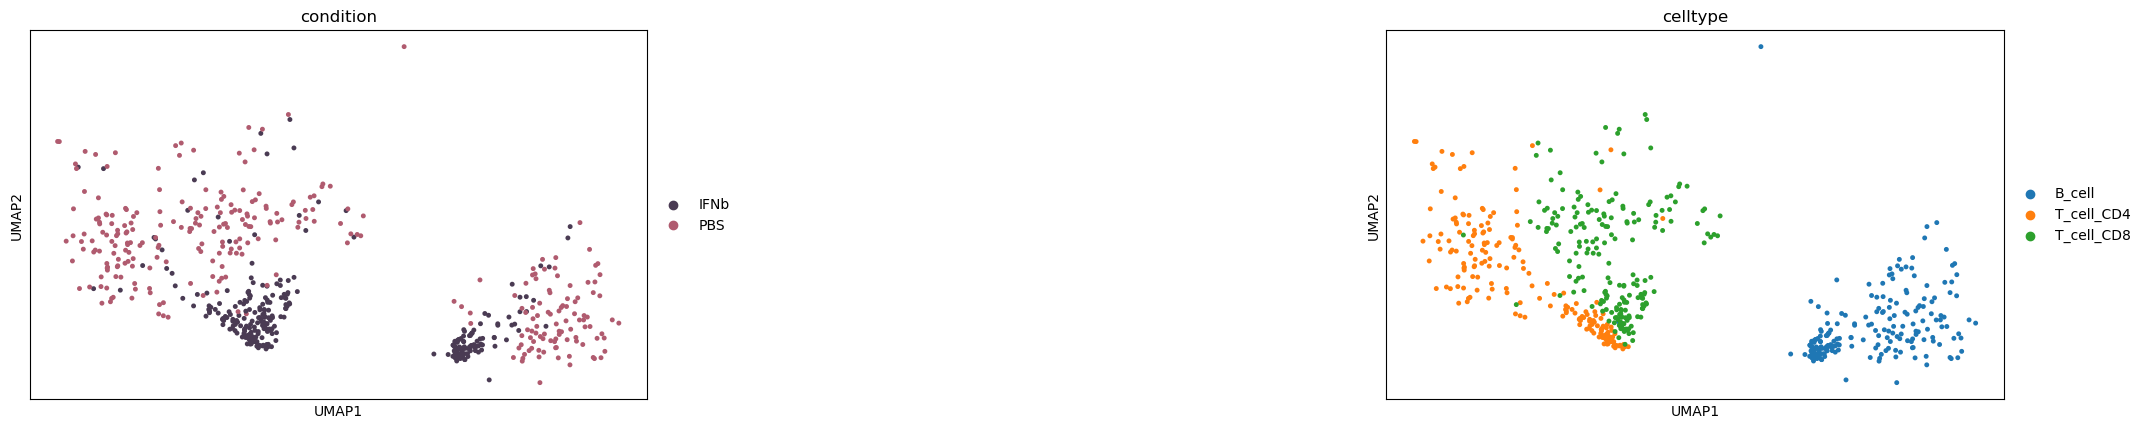

In [17]:
#PBS is control
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "IFNb"])], 
           color=["condition", "celltype"], wspace=1, size=50)

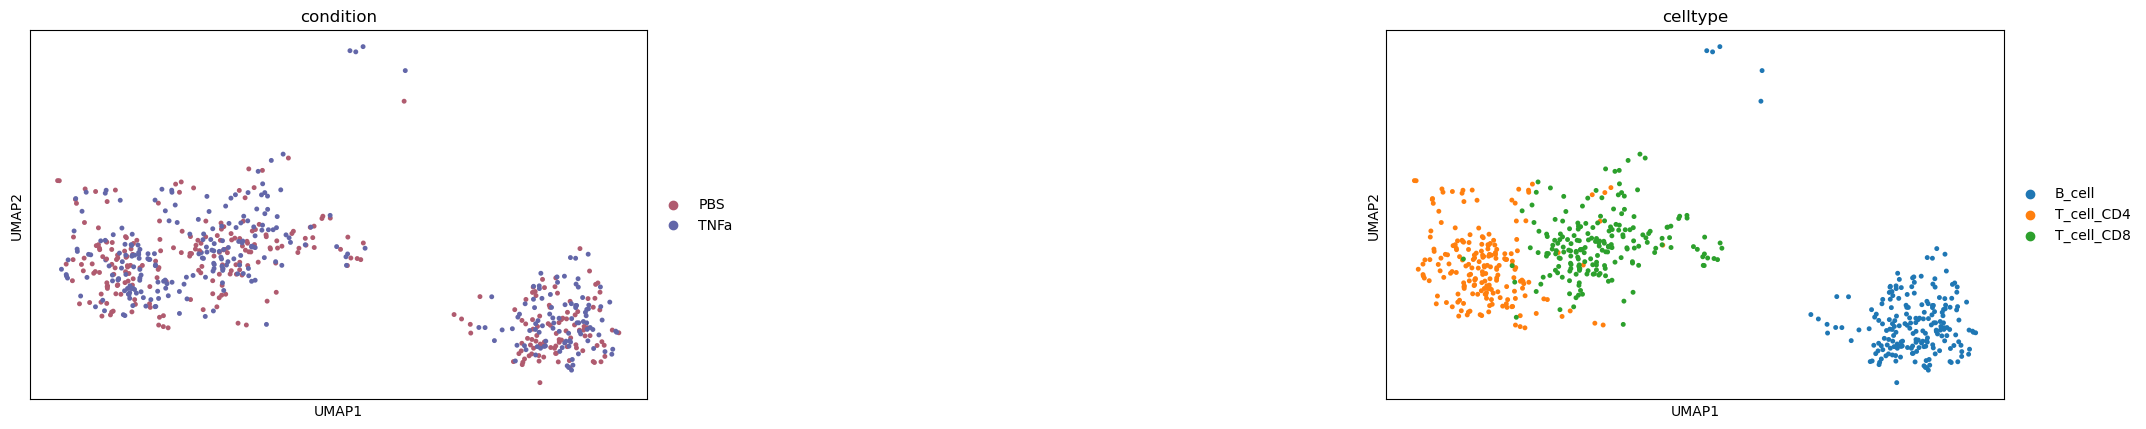

In [18]:
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "TNFa"])], 
           color=["condition", "celltype"], wspace=1, size=50)

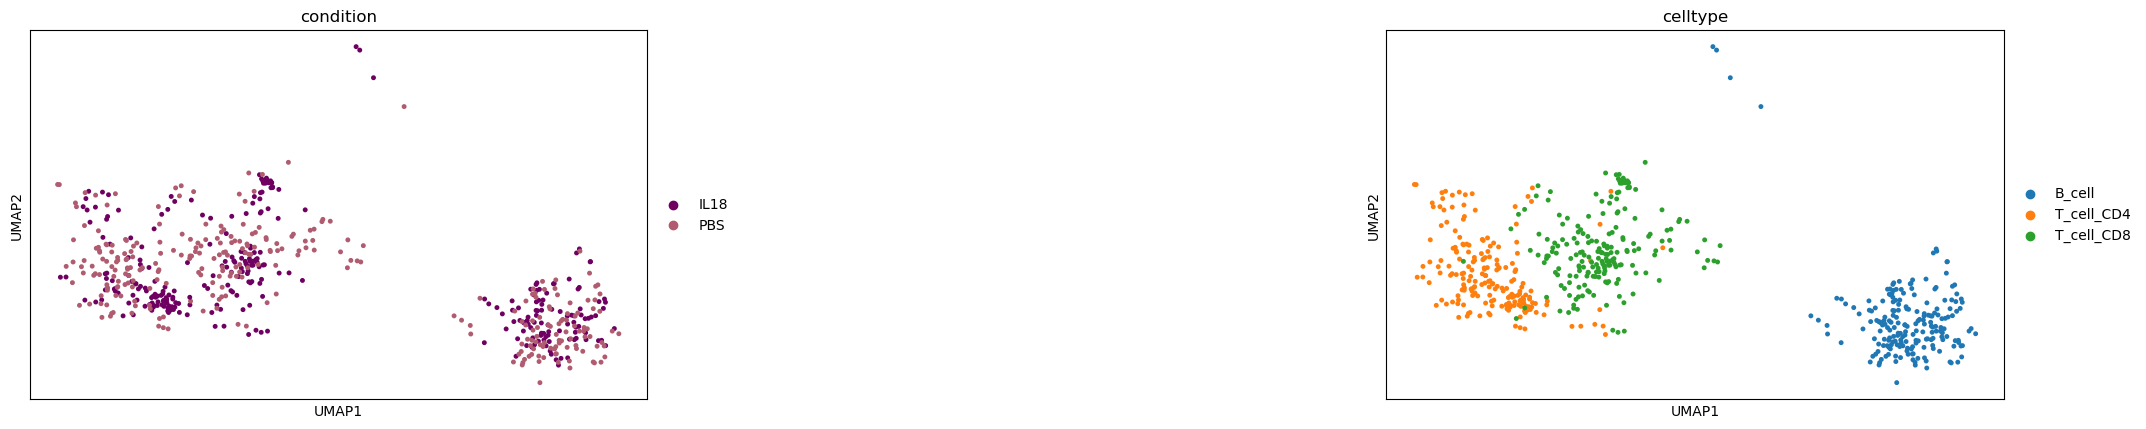

In [19]:
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "IL18"])], 
           color=["condition", "celltype"], wspace=1, size=50)

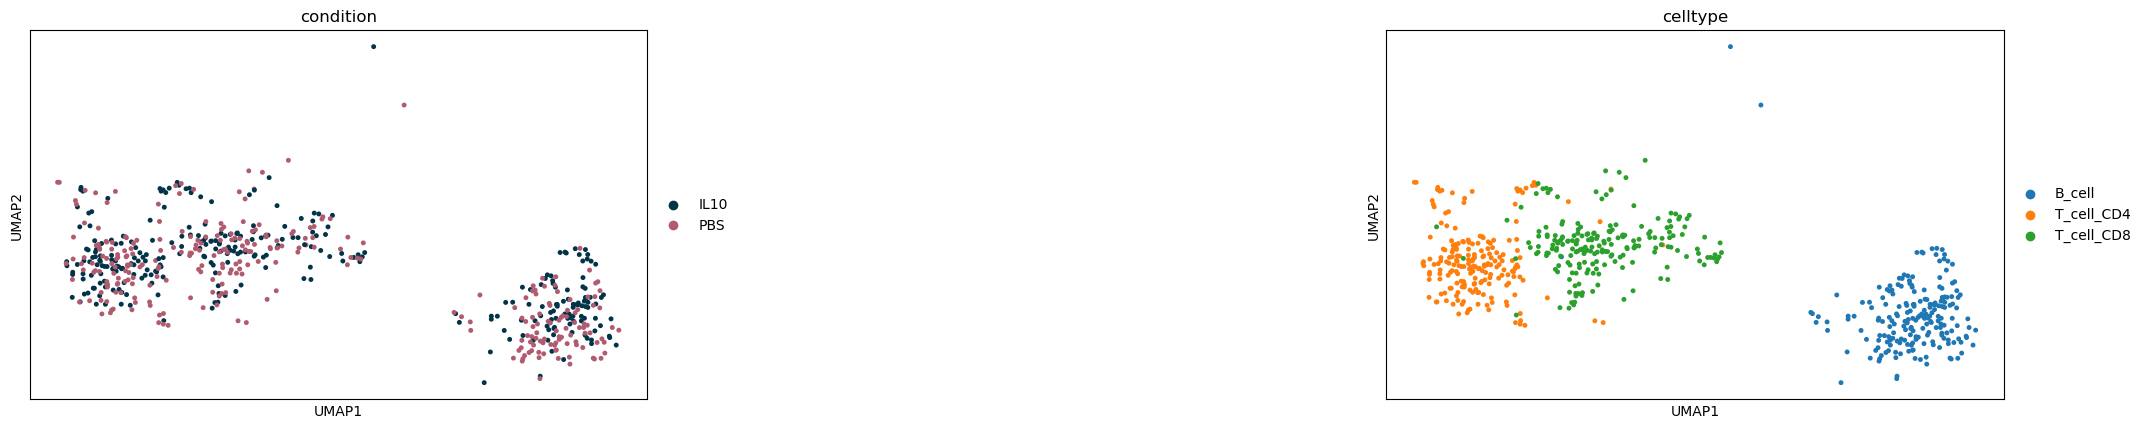

In [20]:
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "IL10"])], 
           color=["condition", "celltype"], wspace=1, size=50)

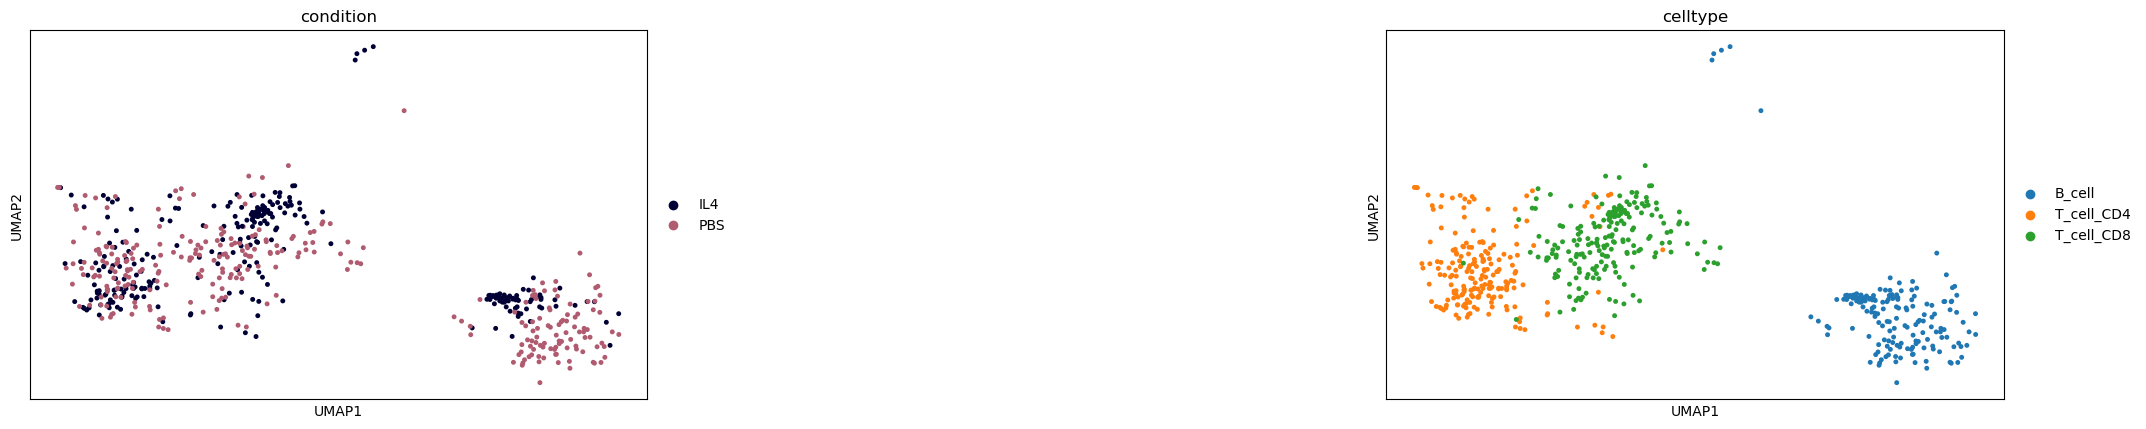

In [21]:
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "IL4"])], 
           color=["condition", "celltype"], wspace=1, size=50)

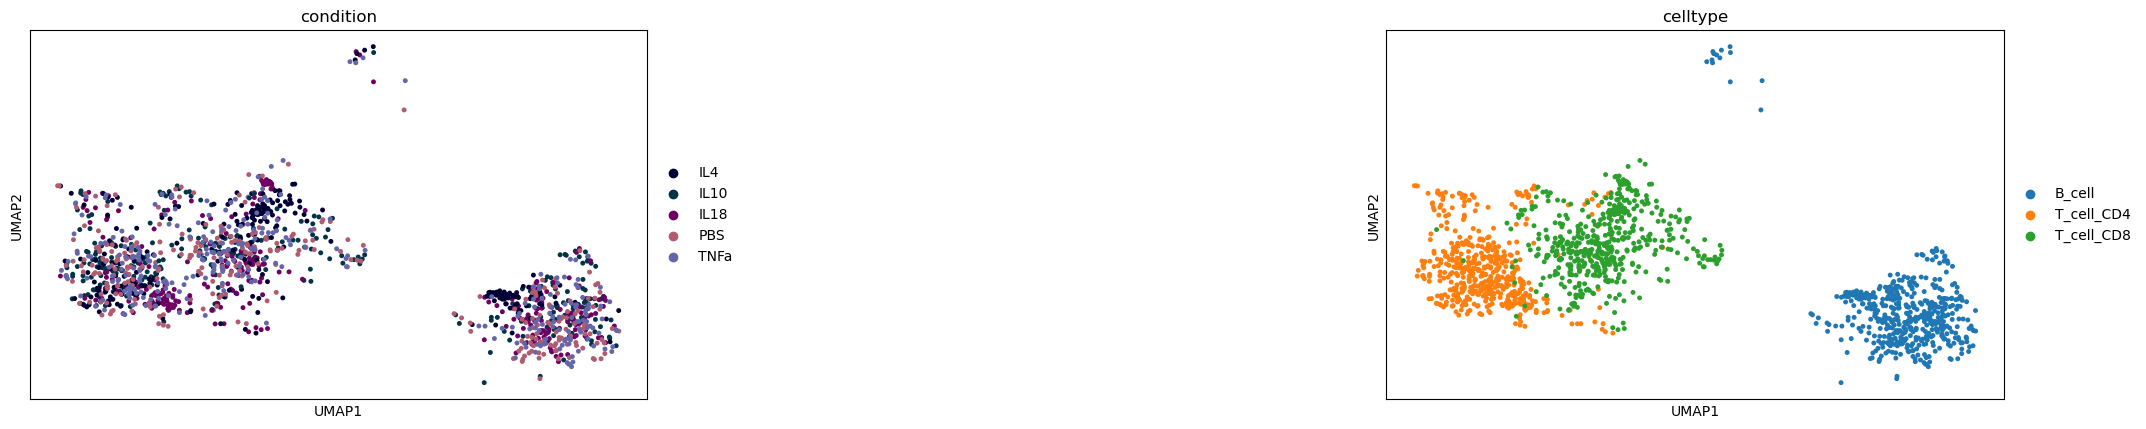

In [22]:
sc.pl.umap(merged[merged.obs["condition"].isin(["PBS", "IL4", "IL10", "IL18", "TNFa"])], 
           color=["condition", "celltype"], wspace=1, size=50)

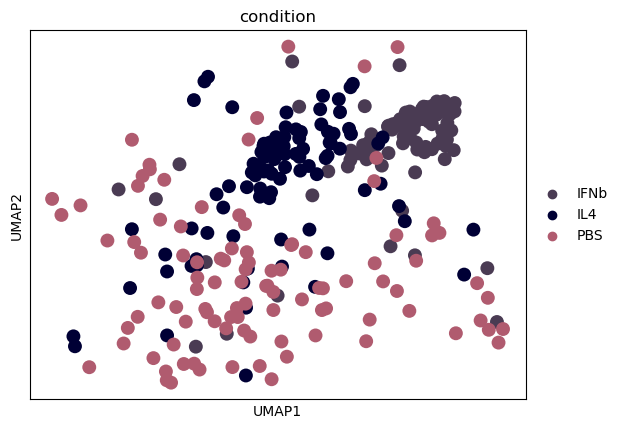

In [23]:
sc.pl.umap(T_cell_CD8[T_cell_CD8.obs["condition"].isin(["PBS", "IL4", "IFNb"])], color="condition")

/home/yalda_y/mambaforge/envs/state_transition/lib/python3.10/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


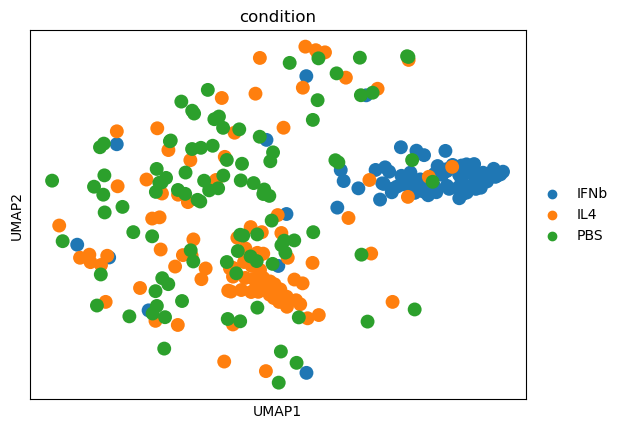

In [24]:
sc.pl.umap(T_cell_CD4[T_cell_CD4.obs["condition"].isin(["PBS", "IL4", "IFNb"])], color="condition")

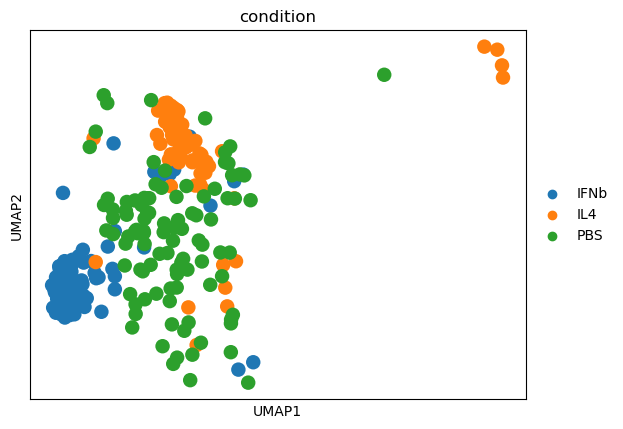

In [25]:
sc.pl.umap(B_cell[B_cell.obs["condition"].isin(["PBS", "IL4", "IFNb"])], color="condition")

In [26]:
#visualization of CD8 T cells after pseudobulk
#they don't look very informative.

pseudo_bulk = []
for rep in T_cell_CD8.obs.rep.unique():
    print(f"rep: {rep}")
    T_cell_CD8_sub = T_cell_CD8[T_cell_CD8.obs["rep"]==rep]
    for cytokine in T_cell_CD8.obs.condition.unique():
        T_cell_CD8_sub = T_cell_CD8_sub[T_cell_CD8_sub.obs["condition"]==cytokine]
        sub_adata = sc.AnnData(X=T_cell_CD8_sub.X.sum(axis=0).reshape(1,-1),
                               var=T_cell_CD8_sub.var[[]])
        sub_adata.obs_names = [rep]
        sub_adata.obs["condition"] = [cytokine] 
        pseudo_bulk.append(sub_adata)
    


rep: rep3
rep: rep2
rep: rep1
rep: rep7
rep: rep10
rep: rep8
rep: rep12
rep: rep6
rep: rep11
rep: rep5
rep: rep13
rep: rep4
rep: rep14
rep: rep9


In [27]:
T_cell_CD8_pseudo = sc.concat(pseudo_bulk)

/home/yalda_y/mambaforge/envs/state_transition/lib/python3.10/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/yalda_y/mambaforge/envs/state_transition/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


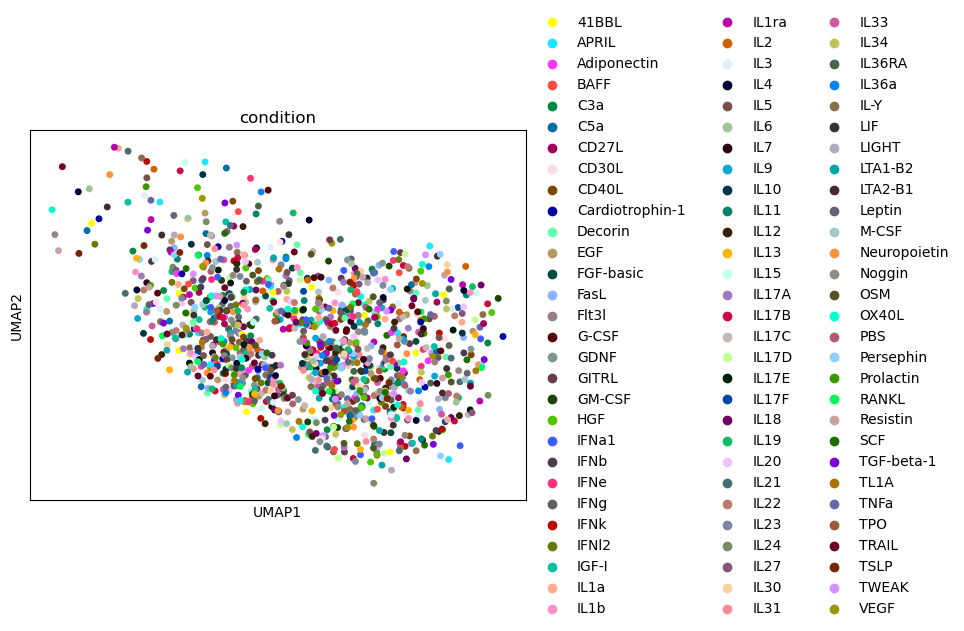

In [28]:
sc.pp.neighbors(T_cell_CD8_pseudo)
sc.tl.umap(T_cell_CD8_pseudo)
sc.pl.umap(T_cell_CD8_pseudo, color="condition")

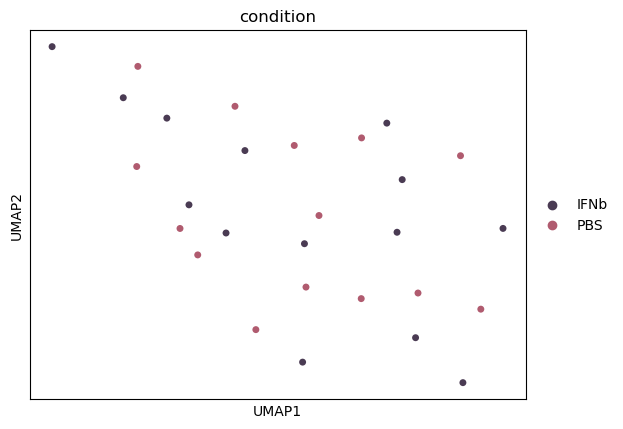

In [29]:
sc.pl.umap(T_cell_CD8_pseudo[T_cell_CD8_pseudo.obs["condition"].isin(["PBS", "IFNb"])], 
           color="condition", wspace=1, size=100)

#doesn't look very informative.

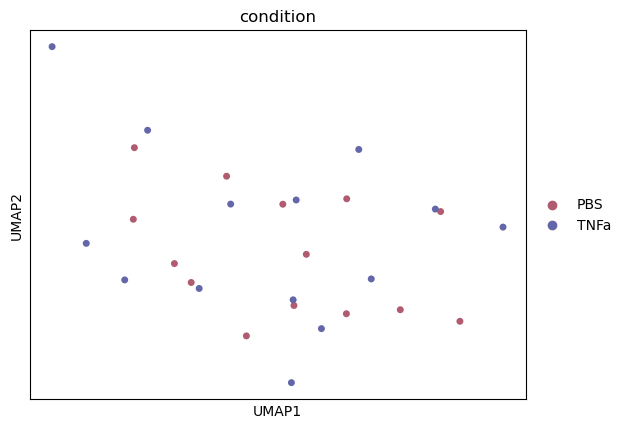

In [30]:
sc.pl.umap(T_cell_CD8_pseudo[T_cell_CD8_pseudo.obs["condition"].isin(["PBS", "TNFa"])], 
           color="condition", wspace=1, size=100)

Comparing distributions of perturbations

In [32]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def MMD(x, y, kernel):
    """Emprical maximum mean discrepancy. The lower the result
       the more evidence that distributions are the same.

    Args:
        x: first sample, distribution P
        y: second sample, distribution Q
        kernel: kernel type such as "multiscale" or "rbf"
    """
    xx, yy, zz = torch.mm(x, x.t()), torch.mm(y, y.t()), torch.mm(x, y.t())
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))
    
    dxx = rx.t() + rx - 2. * xx 
    dyy = ry.t() + ry - 2. * yy 
    dxy = rx.t() + ry - 2. * zz 
    
    XX, YY, XY = (torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device),
                  torch.zeros(xx.shape).to(device))
    
    if kernel == "multiscale":
        
        bandwidth_range = [0.2, 0.5, 0.9, 1.3]
        for a in bandwidth_range:
            XX += a**2 * (a**2 + dxx)**-1
            YY += a**2 * (a**2 + dyy)**-1
            XY += a**2 * (a**2 + dxy)**-1
            
    if kernel == "rbf":
      
        bandwidth_range = [10, 15, 20, 50]
        for a in bandwidth_range:
            XX += torch.exp(-0.5*dxx/a)
            YY += torch.exp(-0.5*dyy/a)
            XY += torch.exp(-0.5*dxy/a)
      
      

    return torch.mean(XX + YY - 2. * XY)

from scipy.stats import wasserstein_distance_nd

In [34]:
#MMD between B cells with different perturbations
cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

B_cell_list = [torch.tensor(B_cell[B_cell.obs["condition"]==i].X) for i in cytokines]

df_mmd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if B_cell_list[i].shape[0] >= B_cell_list[j].shape[0]:
            df_mmd.loc[i, j] = float(MMD(B_cell_list[i][:B_cell_list[j].shape[0],], B_cell_list[j], "multiscale"))
        else:
            df_mmd.loc[i, j] = float(MMD(B_cell_list[i], B_cell_list[j][:B_cell_list[i].shape[0],], "multiscale"))

df_mmd.columns=["B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]
df_mmd.index=["B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]


In [35]:
df_mmd
# IL1a and IL1b show high similarity, IFNg and IL2 are more similar (both inflammatory cytokines), and ctrl, IL4, and TNFa show higher similarity (weird!)

,B_cell_ctrl,B_cell_IFNg,B_cell_IL1a,B_cell_IL1b,B_cell_IL2,B_cell_IL4,B_cell_TNFa
B_cell_ctrl,0.000000,0.119427,0.080006,0.084211,0.105262,0.104016,0.079990
B_cell_IFNg,0.119427,0.000000,0.119430,0.119433,0.119421,0.119516,0.119430
B_cell_IL1a,0.080006,0.119430,0.000000,0.084206,0.105289,0.104006,0.079992
B_cell_IL1b,0.084211,0.119433,0.084206,0.000000,0.105259,0.104004,0.084214
B_cell_IL2,0.105262,0.119421,0.105289,0.105259,0.000000,0.105382,0.105279
B_cell_IL4,0.104016,0.119516,0.104006,0.104004,0.105382,0.000000,0.104010
B_cell_TNFa,0.079990,0.119430,0.079992,0.084214,0.105279,0.104010,0.000000


In [38]:
#Wasserstein distance between B cells with different perturbations
cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

B_cell_list = [torch.tensor(B_cell[B_cell.obs["condition"]==i].X) for i in cytokines]

df_wd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if B_cell_list[i].shape[0] >= B_cell_list[j].shape[0]:
            df_wd.loc[i, j] = float(wasserstein_distance_nd(B_cell_list[i][:B_cell_list[j].shape[0],], B_cell_list[j]))
        else:
            df_wd.loc[i, j] = float(wasserstein_distance_nd(B_cell_list[i], B_cell_list[j][:B_cell_list[i].shape[0],]))

df_wd.columns=["B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]
df_wd.index=["B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]

df_wd

,B_cell_ctrl,B_cell_IFNg,B_cell_IL1a,B_cell_IL1b,B_cell_IL2,B_cell_IL4,B_cell_TNFa
B_cell_ctrl,-0.000000,4.907926e+01,4.722361e+01,4.949938e+01,5.128432e+01,4.909740e+01,4.840242e+01
B_cell_IFNg,49.079259,-5.551115e-16,4.753409e+01,4.963542e+01,5.108842e+01,4.851731e+01,4.780243e+01
B_cell_IL1a,47.223607,4.753409e+01,-2.914335e-16,4.721950e+01,5.007481e+01,4.749854e+01,4.634492e+01
B_cell_IL1b,49.499377,4.963542e+01,4.721950e+01,9.020562e-17,5.102055e+01,4.889715e+01,4.840802e+01
B_cell_IL2,51.284325,5.108842e+01,5.007481e+01,5.102055e+01,9.992007e-16,5.059449e+01,5.011243e+01
B_cell_IL4,49.097397,4.851731e+01,4.749854e+01,4.889715e+01,5.059449e+01,8.326673e-17,4.771623e+01
B_cell_TNFa,48.402424,4.780243e+01,4.634492e+01,4.840802e+01,5.011243e+01,4.771623e+01,-9.714451e-17


In [39]:
#MMD between CD4 and CD8 T cells
cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

T_cell_CD8_list = [torch.tensor(T_cell_CD8[T_cell_CD8.obs["condition"]==i].X) for i in cytokines]
T_cell_CD4_list = [torch.tensor(T_cell_CD4[T_cell_CD4.obs["condition"]==i].X) for i in cytokines]

df_mmd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if T_cell_CD4_list[i].shape[0] >= T_cell_CD8_list[j].shape[0]:
            df_mmd.loc[i, j] = float(MMD(T_cell_CD4_list[i][:T_cell_CD8_list[j].shape[0],], T_cell_CD8_list[j], "multiscale"))
        else:
            df_mmd.loc[i, j] = float(MMD(T_cell_CD4_list[i], T_cell_CD8_list[j][:T_cell_CD4_list[i].shape[0],], "multiscale"))

df_mmd.columns=[ "T_cell_CD8_ctrl", "T_cell_CD8_IFNg", "T_cell_CD8_IL1a", "T_cell_CD8_IL1b", "T_cell_CD8_IL2", "T_cell_CD8_IL4", "T_cell_CD8_TNFa"]
df_mmd.index=["T_cell_CD4_ctrl", "T_cell_CD4_IFNg", "T_cell_CD4_IL1a", "T_cell_CD4_IL1b", "T_cell_CD4_IL2", "T_cell_CD4_IL4", "T_cell_CD4_TNFa"]

df_mmd
#diagonals are the lowest values!  (highest similarities)
#IL1a and IL1b show high smilarity again!

,T_cell_CD8_ctrl,T_cell_CD8_IFNg,T_cell_CD8_IL1a,T_cell_CD8_IL1b,T_cell_CD8_IL2,T_cell_CD8_IL4,T_cell_CD8_TNFa
T_cell_CD4_ctrl,0.080071,0.080097,0.080108,0.080082,0.080319,0.080354,0.080091
T_cell_CD4_IFNg,0.080169,0.080080,0.080132,0.080126,0.080301,0.080389,0.080135
T_cell_CD4_IL1a,0.080165,0.080164,0.080043,0.080055,0.080415,0.080420,0.080117
T_cell_CD4_IL1b,0.080154,0.080146,0.080043,0.080034,0.080325,0.080419,0.080122
T_cell_CD4_IL2,0.080129,0.080086,0.080091,0.080065,0.080213,0.080350,0.080110
T_cell_CD4_IL4,0.080158,0.080159,0.080152,0.080153,0.080324,0.080176,0.080110
T_cell_CD4_TNFa,0.080121,0.080123,0.080062,0.080069,0.080370,0.080343,0.080066


In [40]:
#Wasserstein distance between CD4 and CD8 T cells
cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

T_cell_CD8_list = [torch.tensor(T_cell_CD8[T_cell_CD8.obs["condition"]==i].X) for i in cytokines]
T_cell_CD4_list = [torch.tensor(T_cell_CD4[T_cell_CD4.obs["condition"]==i].X) for i in cytokines]

df_wd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if T_cell_CD4_list[i].shape[0] >= T_cell_CD8_list[j].shape[0]:
            df_wd.loc[i, j] = float(wasserstein_distance_nd(T_cell_CD4_list[i][:T_cell_CD8_list[j].shape[0],], T_cell_CD8_list[j]))
        else:
            df_wd.loc[i, j] = float(wasserstein_distance_nd(T_cell_CD4_list[i], T_cell_CD8_list[j][:T_cell_CD4_list[i].shape[0],]))

df_wd.columns=[ "T_cell_CD8_ctrl", "T_cell_CD8_IFNg", "T_cell_CD8_IL1a", "T_cell_CD8_IL1b", "T_cell_CD8_IL2", "T_cell_CD8_IL4", "T_cell_CD8_TNFa"]
df_wd.index=["T_cell_CD4_ctrl", "T_cell_CD4_IFNg", "T_cell_CD4_IL1a", "T_cell_CD4_IL1b", "T_cell_CD4_IL2", "T_cell_CD4_IL4", "T_cell_CD4_TNFa"]

df_wd
#diagonals are not the lowest values (highest similarities) in contrast with mmd

,T_cell_CD8_ctrl,T_cell_CD8_IFNg,T_cell_CD8_IL1a,T_cell_CD8_IL1b,T_cell_CD8_IL2,T_cell_CD8_IL4,T_cell_CD8_TNFa
T_cell_CD4_ctrl,33.409857,33.799843,34.329609,35.114641,37.732641,33.617295,33.526815
T_cell_CD4_IFNg,33.805147,33.836389,34.583054,35.366080,37.883604,33.693790,33.655570
T_cell_CD4_IL1a,33.211333,33.506850,33.260228,34.092258,37.591717,33.353502,32.930561
T_cell_CD4_IL1b,34.016371,34.333402,34.335233,35.201797,38.424488,34.196317,33.877536
T_cell_CD4_IL2,34.624799,34.707770,35.350554,36.071448,38.434975,34.647189,34.535069
T_cell_CD4_IL4,32.828661,33.168355,33.653382,34.350998,36.485326,31.990708,32.656222
T_cell_CD4_TNFa,32.932914,33.231407,33.428022,34.242360,37.212184,32.865507,32.674397


In [42]:
#MMD between B cells and CD4 T cells

cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

B_cell_list = [torch.tensor(B_cell[B_cell.obs["condition"]==i].X) for i in cytokines]
T_cell_CD4_list = [torch.tensor(T_cell_CD4[T_cell_CD4.obs["condition"]==i].X) for i in cytokines]

df_mmd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if T_cell_CD4_list[i].shape[0] >= B_cell_list[j].shape[0]:
            df_mmd.loc[i, j] = float(MMD(T_cell_CD4_list[i][:B_cell_list[j].shape[0],], B_cell_list[j], "multiscale"))
        else:
            df_mmd.loc[i, j] = float(MMD(T_cell_CD4_list[i], B_cell_list[j][:T_cell_CD4_list[i].shape[0],], "multiscale"))

df_mmd.columns=[ "B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]
df_mmd.index=["T_cell_CD4_ctrl", "T_cell_CD4_IFNg", "T_cell_CD4_IL1a", "T_cell_CD4_IL1b", "T_cell_CD4_IL2", "T_cell_CD4_IL4", "T_cell_CD4_TNFa"]

df_mmd
#diagonals are not the lowest values (highest similarities)
#IL1a and IL1b show high smilarity again!

,B_cell_ctrl,B_cell_IFNg,B_cell_IL1a,B_cell_IL1b,B_cell_IL2,B_cell_IL4,B_cell_TNFa
T_cell_CD4_ctrl,0.080949,0.120412,0.080885,0.085065,0.106238,0.104973,0.080999
T_cell_CD4_IFNg,0.080947,0.120366,0.080879,0.085077,0.106197,0.104953,0.080992
T_cell_CD4_IL1a,0.081076,0.120454,0.080991,0.085179,0.106278,0.105041,0.081120
T_cell_CD4_IL1b,0.080878,0.120291,0.080809,0.084993,0.106104,0.104871,0.080923
T_cell_CD4_IL2,0.080787,0.120183,0.080732,0.084902,0.106034,0.104797,0.080835
T_cell_CD4_IL4,0.081187,0.120562,0.081100,0.085291,0.106418,0.105132,0.081230
T_cell_CD4_TNFa,0.081098,0.120464,0.081013,0.085205,0.106309,0.105059,0.081141


In [43]:
#Wasserstein dstance between B cells and CD4 T cells

cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

B_cell_list = [torch.tensor(B_cell[B_cell.obs["condition"]==i].X) for i in cytokines]
T_cell_CD4_list = [torch.tensor(T_cell_CD4[T_cell_CD4.obs["condition"]==i].X) for i in cytokines]

df_wd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if T_cell_CD4_list[i].shape[0] >= B_cell_list[j].shape[0]:
            df_wd.loc[i, j] = float(wasserstein_distance_nd(T_cell_CD4_list[i][:B_cell_list[j].shape[0],], B_cell_list[j]))
        else:
            df_wd.loc[i, j] = float(wasserstein_distance_nd(T_cell_CD4_list[i], B_cell_list[j][:T_cell_CD4_list[i].shape[0],]))

df_wd.columns=[ "B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]
df_wd.index=["T_cell_CD4_ctrl", "T_cell_CD4_IFNg", "T_cell_CD4_IL1a", "T_cell_CD4_IL1b", "T_cell_CD4_IL2", "T_cell_CD4_IL4", "T_cell_CD4_TNFa"]

df_wd
#diagonals are not the lowest values in most cytokines(highest similarities)

,B_cell_ctrl,B_cell_IFNg,B_cell_IL1a,B_cell_IL1b,B_cell_IL2,B_cell_IL4,B_cell_TNFa
T_cell_CD4_ctrl,47.703784,47.576819,45.703085,47.476520,49.730771,47.749329,47.968052
T_cell_CD4_IFNg,48.104168,47.418567,46.046898,47.737932,49.985011,48.004297,48.322645
T_cell_CD4_IL1a,47.446822,47.515323,45.214799,47.048875,49.707579,47.432173,47.682729
T_cell_CD4_IL1b,47.940402,47.830163,45.829732,47.485810,50.102885,47.998560,48.175509
T_cell_CD4_IL2,48.612111,48.469657,46.531716,48.183506,50.426732,48.511271,48.820945
T_cell_CD4_IL4,47.557444,47.562154,45.325024,47.096707,49.669980,47.028124,47.681474
T_cell_CD4_TNFa,47.320989,47.229571,45.156960,46.895302,49.493427,47.232526,47.424544


Comparing distributions of perturbations after dimensionality reduction with PCA

In [44]:
sc.pp.pca(merged, n_comps=100)
merged

AnnData object with n_obs × n_vars = 25486 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'channel', 'nCount_HTO', 'nFeature_HTO', 'MULTI_ID', 'MULTI_classification', 'percent_mito', 'RNA_snn_res.1.5', 'seurat_clusters', 'cluster_manual', 'celltype', 'channel_hashtag', 'sample', 'rep', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'neighbors', 'umap', 'condition_colors', 'celltype_colors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [50]:
#MMD between different cytokines in B cells
cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

B_cell = merged[merged.obs["celltype"]=="B_cell"]

B_cell_list = [torch.tensor(B_cell[B_cell.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]

df_pca_mmd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if B_cell_list[i].shape[0] >= B_cell_list[j].shape[0]:
            df_pca_mmd.loc[i, j] = float(MMD(B_cell_list[i][:B_cell_list[j].shape[0],], B_cell_list[j], "multiscale"))
        else:
            df_pca_mmd.loc[i, j] = float(MMD(B_cell_list[i], B_cell_list[j][:B_cell_list[i].shape[0],], "multiscale"))

df_pca_mmd.columns=["B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]
df_pca_mmd.index=["B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]

df_pca_mmd
# diagonals are not the lowest values (highest similarities)
#IL1a and IL1b are not more similar to each other than other cytokines

,B_cell_ctrl,B_cell_IFNg,B_cell_IL1a,B_cell_IL1b,B_cell_IL2,B_cell_IL4,B_cell_TNFa
B_cell_ctrl,0.000000,0.119695,0.080071,0.084290,0.105323,0.104794,0.080020
B_cell_IFNg,0.119695,0.000000,0.119665,0.119681,0.119562,0.120253,0.119671
B_cell_IL1a,0.080071,0.119665,0.000000,0.084203,0.105400,0.104707,0.080031
B_cell_IL1b,0.084290,0.119681,0.084203,0.000000,0.105289,0.104656,0.084304
B_cell_IL2,0.105323,0.119562,0.105400,0.105289,0.000000,0.106034,0.105341
B_cell_IL4,0.104794,0.120253,0.104707,0.104656,0.106034,0.000000,0.104707
B_cell_TNFa,0.080020,0.119671,0.080031,0.084304,0.105341,0.104707,0.000000


In [51]:
#MMD between different cytokines in B cells
cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

B_cell = merged[merged.obs["celltype"]=="B_cell"]

B_cell_list = [torch.tensor(B_cell[B_cell.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]

df_pca_wd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if B_cell_list[i].shape[0] >= B_cell_list[j].shape[0]:
            df_pca_wd.loc[i, j] = float(wasserstein_distance_nd(B_cell_list[i][:B_cell_list[j].shape[0],], B_cell_list[j]))
        else:
            df_pca_wd.loc[i, j] = float(wasserstein_distance_nd(B_cell_list[i], B_cell_list[j][:B_cell_list[i].shape[0],]))

df_pca_wd.columns=["B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]
df_pca_wd.index=["B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]

df_pca_wd
#IL1a and IL1b are more similar to each other than other cytokines

,B_cell_ctrl,B_cell_IFNg,B_cell_IL1a,B_cell_IL1b,B_cell_IL2,B_cell_IL4,B_cell_TNFa
B_cell_ctrl,-1.110223e-16,2.701158e+01,2.585072e+01,2.723746e+01,2.805256e+01,2.853737e+01,2.709379e+01
B_cell_IFNg,2.701158e+01,-1.249001e-16,2.618473e+01,2.704705e+01,2.739560e+01,2.756717e+01,2.659780e+01
B_cell_IL1a,2.585072e+01,2.618473e+01,5.551115e-17,2.546235e+01,2.770523e+01,2.734325e+01,2.594195e+01
B_cell_IL1b,2.723746e+01,2.704705e+01,2.546235e+01,-4.440892e-16,2.706915e+01,2.736431e+01,2.684008e+01
B_cell_IL2,2.805256e+01,2.739560e+01,2.770523e+01,2.706915e+01,-1.665335e-16,2.813434e+01,2.761666e+01
B_cell_IL4,2.853737e+01,2.756717e+01,2.734325e+01,2.736431e+01,2.813434e+01,-4.163336e-16,2.761476e+01
B_cell_TNFa,2.709379e+01,2.659780e+01,2.594195e+01,2.684008e+01,2.761666e+01,2.761476e+01,5.551115e-17


In [48]:
#MMD between CD4 T cells and B cells
cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

B_cell = merged[merged.obs["celltype"]=="B_cell"]
T_cell_CD4 = merged[merged.obs["celltype"]=="T_cell_CD4"]

B_cell_list = [torch.tensor(B_cell[B_cell.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]
T_cell_CD4_list = [torch.tensor(T_cell_CD4[T_cell_CD4.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]

df_pca_mmd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if T_cell_CD4_list[i].shape[0] >= B_cell_list[j].shape[0]:
            df_pca_mmd.loc[i, j] = float(MMD(T_cell_CD4_list[i][:B_cell_list[j].shape[0],], B_cell_list[j], "multiscale"))
        else:
            df_pca_mmd.loc[i, j] = float(MMD(T_cell_CD4_list[i], B_cell_list[j][:T_cell_CD4_list[i].shape[0],], "multiscale"))

df_pca_mmd.columns=[ "T_cell_CD4_ctrl", "T_cell_CD4_IFNg", "T_cell_CD4_IL1a", "T_cell_CD4_IL1b", "T_cell_CD4_IL2", "T_cell_CD4_IL4", "T_cell_CD4_TNFa"]
df_pca_mmd.index=["B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]

df_pca_mmd
# diagonals are not the lowest values (highest similarities)

,T_cell_CD4_ctrl,T_cell_CD4_IFNg,T_cell_CD4_IL1a,T_cell_CD4_IL1b,T_cell_CD4_IL2,T_cell_CD4_IL4,T_cell_CD4_TNFa
B_cell_ctrl,0.100097,0.139713,0.099803,0.103357,0.125007,0.124447,0.100486
B_cell_IFNg,0.099329,0.140077,0.098994,0.103152,0.124709,0.124683,0.099659
B_cell_IL1a,0.103441,0.141611,0.103054,0.106140,0.126903,0.126749,0.103799
B_cell_IL1b,0.100992,0.141628,0.100626,0.104580,0.125803,0.125629,0.101361
B_cell_IL2,0.099569,0.139948,0.099230,0.102695,0.125087,0.124700,0.099920
B_cell_IL4,0.104534,0.145352,0.104157,0.107979,0.129733,0.129241,0.104873
B_cell_TNFa,0.103049,0.141938,0.102658,0.106065,0.127164,0.126961,0.103400


In [49]:
#Wasserstein distance between CD4 T cells and B cells
cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

B_cell = merged[merged.obs["celltype"]=="B_cell"]
T_cell_CD4 = merged[merged.obs["celltype"]=="T_cell_CD4"]

B_cell_list = [torch.tensor(B_cell[B_cell.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]
T_cell_CD4_list = [torch.tensor(T_cell_CD4[T_cell_CD4.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]

df_pca_wd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if T_cell_CD4_list[i].shape[0] >= B_cell_list[j].shape[0]:
            df_pca_wd.loc[i, j] = float(wasserstein_distance_nd(T_cell_CD4_list[i][:B_cell_list[j].shape[0],], B_cell_list[j]))
        else:
            df_pca_wd.loc[i, j] = float(wasserstein_distance_nd(T_cell_CD4_list[i], B_cell_list[j][:T_cell_CD4_list[i].shape[0],]))

df_pca_wd.columns=[ "T_cell_CD4_ctrl", "T_cell_CD4_IFNg", "T_cell_CD4_IL1a", "T_cell_CD4_IL1b", "T_cell_CD4_IL2", "T_cell_CD4_IL4", "T_cell_CD4_TNFa"]
df_pca_wd.index=["B_cell_ctrl", "B_cell_IFNg", "B_cell_IL1a", "B_cell_IL1b", "B_cell_IL2", "B_cell_IL4", "B_cell_TNFa"]

df_pca_wd
# diagonals are not the lowest values (highest similarities)

,T_cell_CD4_ctrl,T_cell_CD4_IFNg,T_cell_CD4_IL1a,T_cell_CD4_IL1b,T_cell_CD4_IL2,T_cell_CD4_IL4,T_cell_CD4_TNFa
B_cell_ctrl,30.119256,30.230538,28.861626,29.025917,30.901494,31.460426,31.638513
B_cell_IFNg,30.698142,29.847334,29.077331,29.321155,31.017150,31.642247,32.110659
B_cell_IL1a,30.196303,29.966342,28.681935,28.903478,30.714481,31.229810,31.673224
B_cell_IL1b,30.119409,29.910312,28.631566,28.792688,30.706410,31.217252,31.578179
B_cell_IL2,30.433974,30.129820,28.869836,29.090477,30.827912,31.401739,31.848072
B_cell_IL4,30.584566,30.330675,28.958230,29.218126,31.084144,30.928259,31.921540
B_cell_TNFa,30.163762,29.759920,28.537295,28.785375,30.601388,31.043364,31.489791


In [46]:
#MMD between CD4 and CD8 T cells
cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

T_cell_CD8 = merged[merged.obs["celltype"]=="T_cell_CD8"]
T_cell_CD4 = merged[merged.obs["celltype"]=="T_cell_CD4"]

T_cell_CD8_list = [torch.tensor(T_cell_CD8[T_cell_CD8.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]
T_cell_CD4_list = [torch.tensor(T_cell_CD4[T_cell_CD4.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]

df_pca_mmd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if T_cell_CD4_list[i].shape[0] >= T_cell_CD8_list[j].shape[0]:
            df_pca_mmd.loc[i, j] = float(MMD(T_cell_CD4_list[i][:T_cell_CD8_list[j].shape[0],], T_cell_CD8_list[j], "multiscale"))
        else:
            df_pca_mmd.loc[i, j] = float(MMD(T_cell_CD4_list[i], T_cell_CD8_list[j][:T_cell_CD4_list[i].shape[0],], "multiscale"))

df_pca_mmd.columns=[ "T_cell_CD4_ctrl", "T_cell_CD4_IFNg", "T_cell_CD4_IL1a", "T_cell_CD4_IL1b", "T_cell_CD4_IL2", "T_cell_CD4_IL4", "T_cell_CD4_TNFa"]
df_pca_mmd.index=["T_cell_CD8_ctrl", "T_cell_CD8_IFNg", "T_cell_CD8_IL1a", "T_cell_CD8_IL1b", "T_cell_CD8_IL2", "T_cell_CD8_IL4", "T_cell_CD8_TNFa"]

df_pca_mmd
# diagonals are mostly the lowest values (highest similarities)

,T_cell_CD4_ctrl,T_cell_CD4_IFNg,T_cell_CD4_IL1a,T_cell_CD4_IL1b,T_cell_CD4_IL2,T_cell_CD4_IL4,T_cell_CD4_TNFa
T_cell_CD8_ctrl,0.088325,0.090534,0.090211,0.088936,0.095317,0.099030,0.089549
T_cell_CD8_IFNg,0.092365,0.088599,0.089516,0.089931,0.093942,0.098968,0.090488
T_cell_CD8_IL1a,0.093462,0.092821,0.087263,0.086936,0.098338,0.101854,0.091842
T_cell_CD8_IL1b,0.090867,0.090817,0.086713,0.085908,0.096250,0.100147,0.090092
T_cell_CD8_IL2,0.089869,0.088540,0.087719,0.087605,0.093182,0.096999,0.088480
T_cell_CD8_IL4,0.093324,0.093490,0.090820,0.090509,0.094820,0.093949,0.090534
T_cell_CD8_TNFa,0.091595,0.091024,0.087715,0.087366,0.096176,0.098697,0.089176


In [47]:
#Wasserstein distance between CD4 and CD8 T cells
cytokines = ["PBS", "IFNg", "IL1a", "IL1b", "IL2", "IL4", "TNFa"]

T_cell_CD8 = merged[merged.obs["celltype"]=="T_cell_CD8"]
T_cell_CD4 = merged[merged.obs["celltype"]=="T_cell_CD4"]

T_cell_CD8_list = [torch.tensor(T_cell_CD8[T_cell_CD8.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]
T_cell_CD4_list = [torch.tensor(T_cell_CD4[T_cell_CD4.obs["condition"]==i].obsm["X_pca"]) for i in cytokines]

df_pca_wd = pd.DataFrame(np.zeros((len(cytokines),len(cytokines))))

for i in range(len(cytokines)):
    for j in range(len(cytokines)):
        if T_cell_CD4_list[i].shape[0] >= T_cell_CD8_list[j].shape[0]:
            df_pca_wd.loc[i, j] = float(wasserstein_distance_nd(T_cell_CD4_list[i][:T_cell_CD8_list[j].shape[0],], T_cell_CD8_list[j]))
        else:
            df_pca_wd.loc[i, j] = float(wasserstein_distance_nd(T_cell_CD4_list[i], T_cell_CD8_list[j][:T_cell_CD4_list[i].shape[0],]))

df_pca_wd.columns=[ "T_cell_CD4_ctrl", "T_cell_CD4_IFNg", "T_cell_CD4_IL1a", "T_cell_CD4_IL1b", "T_cell_CD4_IL2", "T_cell_CD4_IL4", "T_cell_CD4_TNFa"]
df_pca_wd.index=["T_cell_CD8_ctrl", "T_cell_CD8_IFNg", "T_cell_CD8_IL1a", "T_cell_CD8_IL1b", "T_cell_CD8_IL2", "T_cell_CD8_IL4", "T_cell_CD8_TNFa"]

df_pca_wd
# CD4 T cell vs CD8 T cells
# diagonals are mostly the lowest values (highest similarities)
#IL1a and IL1b show low distances (high similarities)

,T_cell_CD4_ctrl,T_cell_CD4_IFNg,T_cell_CD4_IL1a,T_cell_CD4_IL1b,T_cell_CD4_IL2,T_cell_CD4_IL4,T_cell_CD4_TNFa
T_cell_CD8_ctrl,10.667596,11.282566,11.220930,11.408649,15.335932,12.589748,10.940909
T_cell_CD8_IFNg,11.672552,11.120418,11.229589,11.819794,15.204620,12.722354,11.128911
T_cell_CD8_IL1a,11.283076,11.287562,10.211029,10.575037,15.531476,12.659535,10.920703
T_cell_CD8_IL1b,11.100767,11.334042,10.381513,10.741075,15.568304,12.705158,10.921743
T_cell_CD8_IL2,11.269486,11.133422,10.949472,11.425387,14.802995,12.371914,10.994051
T_cell_CD8_IL4,10.950215,11.281077,10.675317,11.099271,13.670683,10.777300,10.431848
T_cell_CD8_TNFa,10.898424,10.990294,10.268654,10.645129,14.888724,11.893101,10.350412


Calculate difference vectors to see if they are similar between cell types

In [20]:
def calc_dif_vec(adata, ctrl, pert):
    ctrl_mean = adata[adata.obs["condition"]==ctrl].obsm["X_pca"].mean(axis=0) 
    pert_mean = adata[adata.obs["condition"]==pert].obsm["X_pca"].mean(axis=0)
    return pert_mean - ctrl_mean

In [21]:
B_cell_IFNg_vec = calc_dif_vec(B_cell, "PBS", "IFNg")
B_cell_IL1a_vec = calc_dif_vec(B_cell, "PBS", "IL1a")
B_cell_IL1b_vec = calc_dif_vec(B_cell, "PBS", "IL1b")
B_cell_IL2_vec = calc_dif_vec(B_cell, "PBS", "IL2")
B_cell_IL4_vec = calc_dif_vec(B_cell, "PBS", "IL4")
B_cell_TNFa_vec = calc_dif_vec(B_cell, "PBS", "TNFa")

In [22]:
T_cell_CD4_IFNg_vec = calc_dif_vec(T_cell_CD4, "PBS", "IFNg")
T_cell_CD4_IL1a_vec = calc_dif_vec(T_cell_CD4, "PBS", "IL1a")
T_cell_CD4_IL1b_vec = calc_dif_vec(T_cell_CD4, "PBS", "IL1b")
T_cell_CD4_IL2_vec = calc_dif_vec(T_cell_CD4, "PBS", "IL2")
T_cell_CD4_IL4_vec = calc_dif_vec(T_cell_CD4, "PBS", "IL4")
T_cell_CD4_TNFa_vec = calc_dif_vec(T_cell_CD4, "PBS", "TNFa")

In [25]:
#vector similarities of cytokines for B cells
vec_sim_df = pd.DataFrame(np.zeros((6,6)))

B_cell_vec_list = [B_cell_IFNg_vec, B_cell_IL1a_vec, B_cell_IL1b_vec, B_cell_IL2_vec, B_cell_IL4_vec, B_cell_TNFa_vec]

for i in range(len(B_cell_vec_list)):
    for j in range(len(B_cell_vec_list)):
        vec_sim_df.loc[i, j] = np.dot(B_cell_vec_list[i], B_cell_vec_list[j])

vec_sim_df.columns = ["B_cell_IFNg_vec", "B_cell_IL1a_vec", "B_cell_IL1b_vec", "B_cell_IL2_vec", "B_cell_IL4_vec", "B_cell_TNFa_vec"]
vec_sim_df.index = ["B_cell_IFNg_vec", "B_cell_IL1a_vec", "B_cell_IL1b_vec", "B_cell_IL2_vec", "B_cell_IL4_vec", "B_cell_TNFa_vec"]
vec_sim_df


,B_cell_IFNg_vec,B_cell_IL1a_vec,B_cell_IL1b_vec,B_cell_IL2_vec,B_cell_IL4_vec,B_cell_TNFa_vec
B_cell_IFNg_vec,46.276676,11.747368,10.107399,17.443090,28.408180,7.020428
B_cell_IL1a_vec,11.747368,11.884463,11.287518,8.967471,17.855424,5.210206
B_cell_IL1b_vec,10.107399,11.287518,19.400194,14.225481,16.326449,3.423033
B_cell_IL2_vec,17.443090,8.967471,14.225481,20.193453,17.524647,5.506847
B_cell_IL4_vec,28.408180,17.855424,16.326449,17.524647,82.434294,8.587177
B_cell_TNFa_vec,7.020428,5.210206,3.423033,5.506847,8.587177,10.178060


In [24]:
#vector similarities of cytokines between CD4 T cells and B cells
vec_sim_df = pd.DataFrame(np.zeros((6,6)))

B_cell_vec_list = [B_cell_IFNg_vec, B_cell_IL1a_vec, B_cell_IL1b_vec, B_cell_IL2_vec, B_cell_IL4_vec, B_cell_TNFa_vec]
T_cell_CD4_vec_list = [T_cell_CD4_IFNg_vec, T_cell_CD4_IL1a_vec, T_cell_CD4_IL1b_vec, T_cell_CD4_IL2_vec, T_cell_CD4_IL4_vec, T_cell_CD4_TNFa_vec]

for i in range(len(T_cell_CD4_vec_list)):
    for j in range(len(B_cell_vec_list)):
        vec_sim_df.loc[i, j] = np.dot(T_cell_CD4_vec_list[i], B_cell_vec_list[j])

vec_sim_df.columns = ["B_cell_IFNg_vec", "B_cell_IL1a_vec", "B_cell_IL1b_vec", "B_cell_IL2_vec", "B_cell_IL4_vec", "B_cell_TNFa_vec"]
vec_sim_df.index = ["T_cell_CD4_IFNg_vec", "T_cell_CD4_IL1a_vec", "T_cell_CD4_IL1b_vec", "T_cell_CD4_IL2_vec", "T_cell_CD4_IL4_vec", "T_cell_CD4_TNFa_vec"]
vec_sim_df
#vectors for the same perturbation are mostly similar between B cells and CD4 T cells

,B_cell_IFNg_vec,B_cell_IL1a_vec,B_cell_IL1b_vec,B_cell_IL2_vec,B_cell_IL4_vec,B_cell_TNFa_vec
T_cell_CD4_IFNg_vec,23.252094,5.042648,3.728328,8.277761,5.576133,2.985639
T_cell_CD4_IL1a_vec,5.929840,5.543500,5.209603,3.575824,4.249137,2.695503
T_cell_CD4_IL1b_vec,5.124831,4.081516,4.419832,3.319746,2.010359,2.089207
T_cell_CD4_IL2_vec,11.546093,3.706358,3.125529,6.821234,8.056354,2.162575
T_cell_CD4_IL4_vec,8.517715,6.422621,5.143017,6.757301,23.201147,3.133342
T_cell_CD4_TNFa_vec,7.996940,5.263917,4.497076,4.923121,8.858288,3.185605


Calculate similarity between each cytokine's pathway with others

In [26]:
#calculate similarity between vectors of all types of Interleukin perturbation

ILs = [i for i in list(set(B_cell.obs["condition"])) if i.startswith("IL")]

dif_vec_dic = {}
for il in ILs:
    dif_vec_dic[il] = calc_dif_vec(B_cell, "PBS", il)

all_vectors = list(dif_vec_dic.values())
vec_sim_df = pd.DataFrame(np.zeros((len(all_vectors), len(all_vectors))))

for i in range(len(all_vectors)):
    for j in range(len(all_vectors)):
        vec_sim_df.loc[i, j] = np.dot(all_vectors[i], all_vectors[j])

vec_sim_df.columns = ILs
vec_sim_df.index = ILs
vec_sim_df

#some similar Interleukins have high vector similarity (IL1a, IL1b, IL2, IL6)

,IL17B,IL17A,IL23,IL15,IL19,IL33,IL18,IL36a,IL27,IL4,...,IL36RA,IL22,IL12,IL1b,IL17F,IL31,IL3,IL6,IL34,IL13
IL17B,16.090655,8.265499,14.753255,4.401962,-0.129236,7.994982,8.725956,7.235272,8.732026,8.091551,...,7.244062,1.007861,9.262637,-6.694143,6.683673,0.147095,5.359644,2.280742,2.968112,3.130773
IL17A,8.265499,11.217304,9.986306,6.130766,2.221353,7.391906,7.487147,8.356735,7.900413,13.509231,...,7.125537,3.862442,9.116063,-0.938608,5.927782,4.888905,7.883466,6.998195,3.727769,5.859483
IL23,14.753255,9.986306,18.429268,4.637392,0.405855,7.533554,9.051171,9.026226,9.582358,8.131702,...,7.968091,1.595216,9.664555,-6.163197,7.821101,2.039851,7.249540,3.890103,3.665751,5.902983
IL15,4.401962,6.130766,4.637392,25.834454,4.255533,7.568379,22.099688,14.049915,12.168044,14.372201,...,7.907112,5.825889,12.052557,8.769749,2.274791,5.543274,9.364803,8.511541,7.812569,7.504852
IL19,-0.129236,2.221353,0.405855,4.255533,5.082622,0.488089,2.889281,3.298649,2.986976,6.159435,...,2.692722,3.935933,1.338185,5.581340,1.239425,4.681450,4.234457,4.103309,3.755108,4.260395
IL33,7.994982,7.391906,7.533554,7.568379,0.488089,10.440292,8.109761,6.725619,7.077276,4.608568,...,6.403190,1.434007,9.835664,-2.435721,4.077674,1.341302,3.378126,4.087039,2.311930,1.217735
IL18,8.725956,7.487147,9.051171,22.099688,2.889281,8.109761,28.116287,14.404665,13.098831,13.347596,...,8.517982,4.649186,13.678286,3.334457,4.535944,4.318692,8.038725,7.354027,6.419447,5.987826
IL36a,7.235272,8.356735,9.026226,14.049915,3.298649,6.725619,14.404665,15.729271,9.547083,20.544277,...,7.039874,4.493827,10.950207,5.535074,4.409477,5.334406,9.064015,7.993745,6.348116,6.091343
IL27,8.732026,7.900413,9.582358,12.168044,2.986976,7.077276,13.098831,9.547083,11.706141,9.410873,...,8.350204,4.504056,9.420410,0.944098,5.049667,4.446318,8.020741,6.103605,5.494201,6.693453
IL4,8.091551,13.509231,8.131702,14.372201,6.159435,4.608568,13.347596,20.544277,9.410873,82.434294,...,5.319042,8.476817,13.726500,16.326449,3.685576,7.032282,17.090105,14.488190,9.166275,7.330960


In [27]:
#load functional interactions from reactome pathways
interactions = pd.read_excel("../reactome_FIsInGene_061424_with_annotations.xlsx")

In [28]:
interactions

,Gene1,Gene2,Annotation,Direction,Score
0,A1CF,APOBEC1,catalyzed by; complex; input,<-,1.00
1,A1CF,EP300,expression regulated by,<-,1.00
2,A1CF,RBM47,predicted,-,0.89
3,A2M,APOA1,inhibit,-|,1.00
4,A2M,BMP1,inhibit,-|,1.00
...,...,...,...,...,...
269784,ZW10,ZWILCH,complex; input,-,1.00
269785,ZW10,ZWINT,complex; input,-,1.00
269786,ZWILCH,ZWINT,complex; input,-,1.00
269787,ZXDA,ZXDB,predicted,-,0.96


In [29]:
interactions.describe()

,Score
count,269789.000000
mean,0.975873
std,0.039865
min,0.890000
25%,0.940000
50%,1.000000
75%,1.000000
max,1.000000


In [30]:
interaction_list = list(zip(interactions["Gene1"], interactions["Gene2"]))

In [31]:
#create a graph from list of interactions
import networkx as nx
G = nx.from_edgelist(interaction_list)

In [32]:
#number of genes the interactions cover
len(G.nodes)

13294

In [91]:
#Get neighbors of the interleukin receptors in the graph
IL_receptors_dic = {}
for il in ILs:
    receptors = [i for i in list(G.nodes) if f"{il}R" in i]
    subtypes = ["A", "B", "C", "D", "E", "a", "b"]
    if il.endswith(tuple(subtypes)):
        subtype = il[-1]
        il_nosubtype = il.rstrip(subtype)
        subtype_receptors = [i for i in list(G.nodes) if f"{il_nosubtype}R{subtype.upper()}" in i]

    receptors.extend(subtype_receptors)
    IL_receptors_dic[il] = receptors

neighbors = {}

def get_first_neighbors(g, gene_list):
    neighbors = []
    for gene in gene_list:
        n = list(g.neighbors(gene))
        neighbors.extend(n)
    return list(set(neighbors))

def combine_n_distant_neighbors(g, gene_list, n=1):
    neighbors = []
    i=0
    while i<n:
        gene_list = get_first_neighbors(g, gene_list)
        neighbors.extend(gene_list)
        i+=1
    return list(set(neighbors))
  
for il in ILs:
    il_neighbors = combine_n_distant_neighbors(G, IL_receptors_dic[il], n=1)
    neighbors[il] = il_neighbors


In [34]:
def jaccard(list1, list2):
    intersect = len(set(list1).intersection(set(list2)))
    union = len(list(set(list1+list2)))
    if union==0:
        return 0
    return intersect/union

In [92]:
neighbors_list = list(neighbors.values())
jaccard_similarities = pd.DataFrame(np.zeros((len(ILs),len(ILs))))
for i in range(len(ILs)):
    for j in range(len(ILs)):
        jaccard_index = jaccard(neighbors_list[i], neighbors_list[j])
        jaccard_similarities.loc[i, j] = jaccard_index

jaccard_similarities.columns = ILs
jaccard_similarities.index = ILs
jaccard_similarities
#some of the interleukins had no receptor in the interactions list

,IL17B,IL17A,IL23,IL15,IL19,IL33,IL18,IL36a,IL27,IL4,...,IL36RA,IL22,IL12,IL1b,IL17F,IL31,IL3,IL6,IL34,IL13
IL17B,1.000000,0.222222,0.068966,0.111111,0.222222,0.222222,0.060606,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
IL17A,0.222222,1.000000,0.259259,0.437500,1.000000,1.000000,0.225806,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
IL23,0.068966,0.259259,1.000000,0.228571,0.259259,0.259259,0.526316,0.0,0.235294,0.133333,...,0.0,0.054054,0.180180,0.0,0.0,0.000000,0.079365,0.090909,0.0,0.098039
IL15,0.111111,0.437500,0.228571,1.000000,0.437500,0.437500,0.205128,0.0,0.068966,0.163265,...,0.0,0.076923,0.052632,0.0,0.0,0.055556,0.096154,0.113636,0.0,0.125000
IL19,0.222222,1.000000,0.259259,0.437500,1.000000,1.000000,0.225806,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
IL33,0.222222,1.000000,0.259259,0.437500,1.000000,1.000000,0.225806,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
IL18,0.060606,0.225806,0.526316,0.205128,0.225806,0.225806,1.000000,0.0,0.210526,0.074627,...,0.0,0.075000,0.144068,0.0,0.0,0.000000,0.043478,0.049180,0.0,0.090909
IL36a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
IL27,0.000000,0.000000,0.235294,0.068966,0.000000,0.000000,0.210526,0.0,1.000000,0.191489,...,0.0,0.125000,0.133333,0.0,0.0,0.058824,0.098039,0.142857,0.0,0.222222
IL4,0.000000,0.000000,0.133333,0.163265,0.000000,0.000000,0.074627,0.0,0.191489,1.000000,...,0.0,0.060000,0.250000,0.0,0.0,0.023256,0.389831,0.156250,0.0,0.590909


In [198]:
#correlation between receptor neighbors similarity and vector similiarity
jaccard_index_list = [i[0] for i in jaccard_similarities.values.reshape(-1,1)]
vec_sim_list = [i[0] for i in vec_sim_df.values.reshape(-1,1)]
import scipy
scipy.stats.pearsonr(jaccard_index_list, vec_sim_list)[0]


0.26015637642148576

<Axes: >

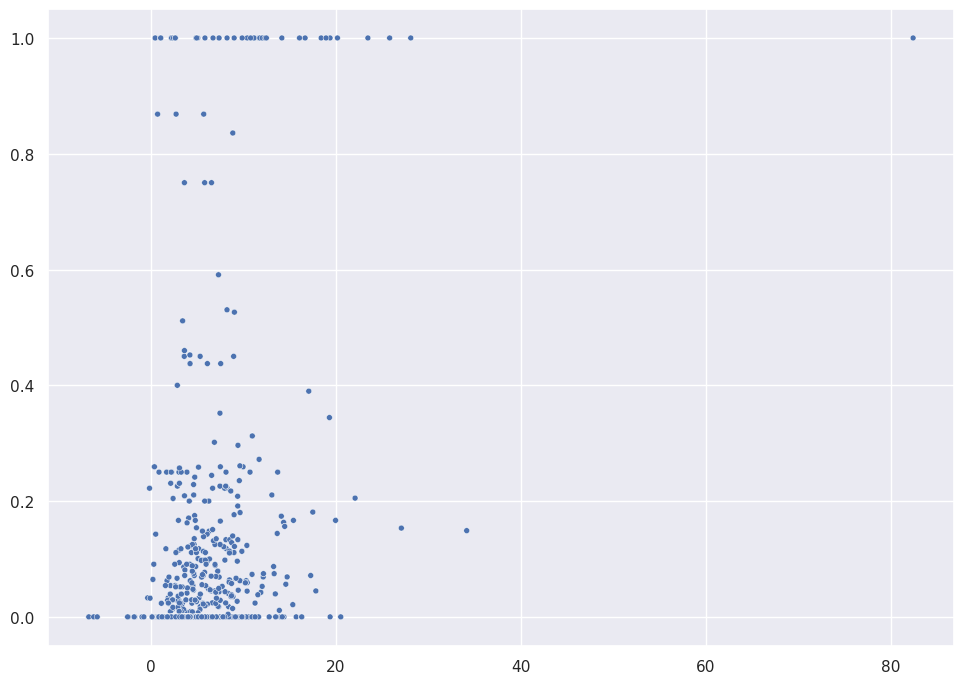

In [94]:
#scatter plot of vector similarities and jaccard indeces
sns.scatterplot(
    x=vec_sim_list,
    y=jaccard_index_list,
    size=0.5,
    legend=False
)

In [95]:
#normalized vector similarities
vec_sim_df_norm = pd.DataFrame(np.array(vec_sim_df)/np.array(vec_sim_df).max(axis=0), columns=vec_sim_df.columns, index=vec_sim_df.index)

In [97]:
#normalized jaccard similarities
jaccard_similarities_norm = pd.DataFrame(np.array(jaccard_similarities)/np.array(jaccard_similarities).max(axis=0), 
                                         columns=jaccard_similarities.columns, 
                                         index=jaccard_similarities.index)

/tmp/ipykernel_522/179801283.py:1: RuntimeWarning: invalid value encountered in divide
  jaccard_similarities_norm = pd.DataFrame(np.array(jaccard_similarities)/np.array(jaccard_similarities).max(axis=0),


<Axes: >

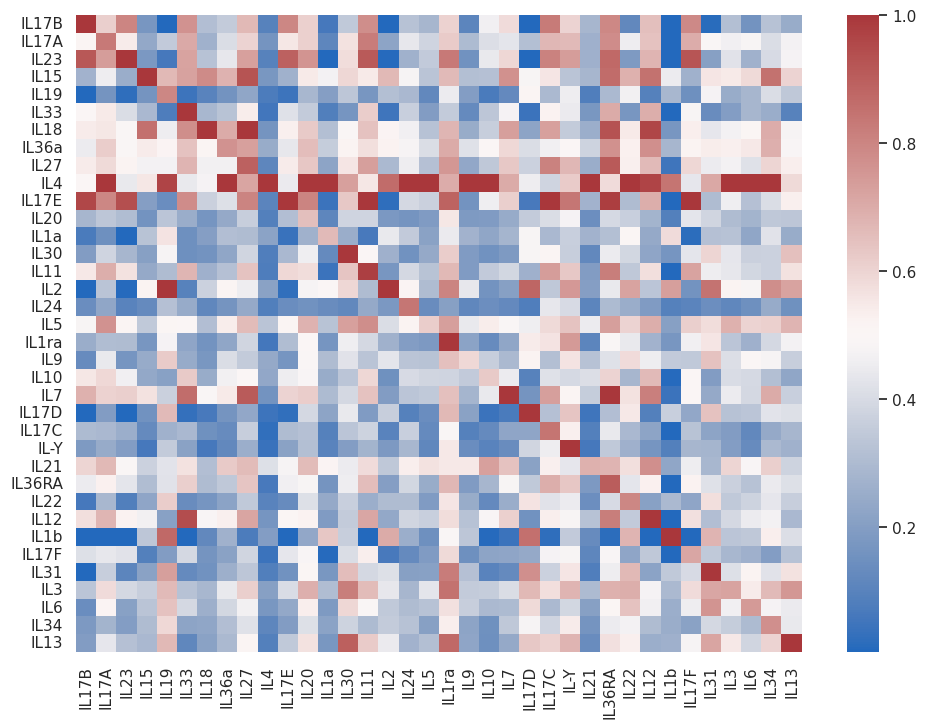

In [96]:
#vector similarities heatmap without sorting
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(
    data=vec_sim_df_norm,
    robust=True,
    cmap="vlag"
    
)

<Axes: >

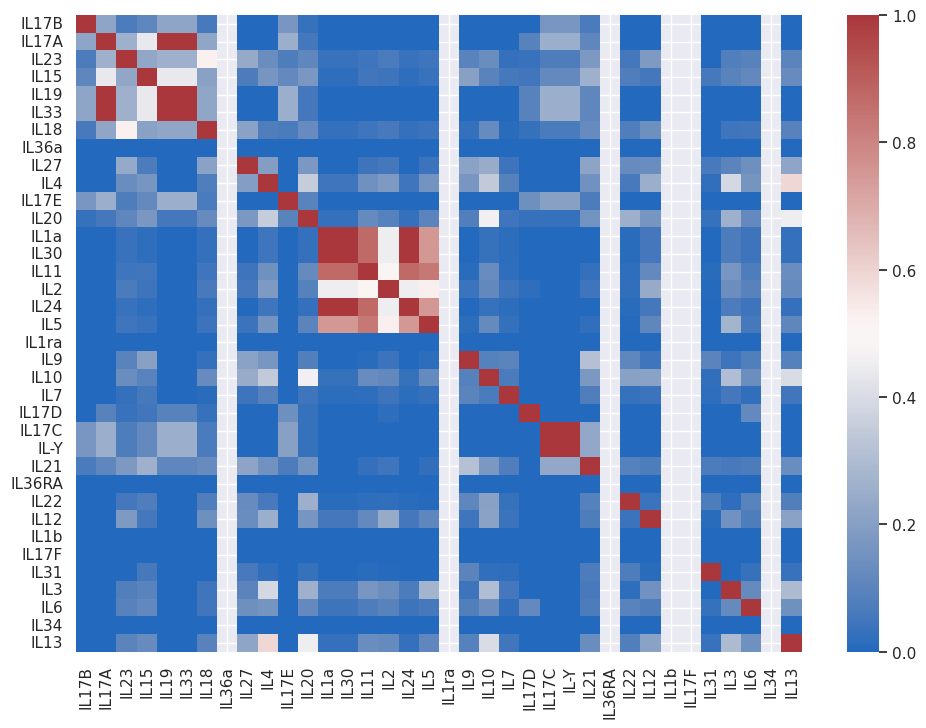

In [99]:
#jaccard similarities without sorting (some cytokines did not have any receptors in the interactome)
sns.heatmap(
    data=jaccard_similarities_norm,
    cmap="vlag",
    robust=True
    
)

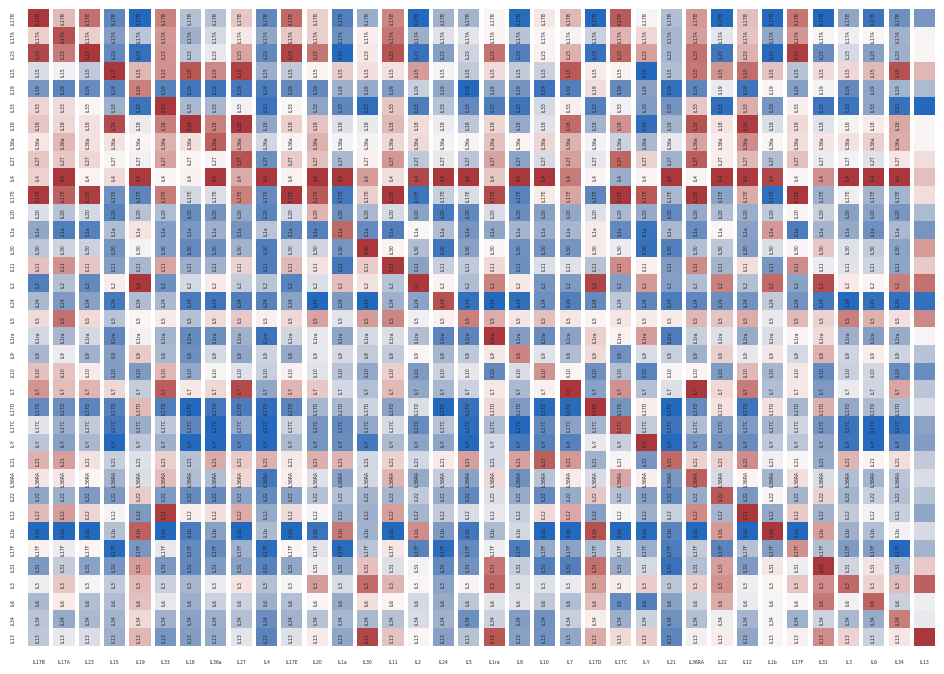

In [165]:
#unsorted vector similarity matrix
fig, axes  = plt.subplots(nrows=1, ncols=len(vec_sim_df_norm.columns))
#sns.set_context("paper", rc={"font.size":0.0005}) 
sns.set(font_scale=0.3)                                                 

for i, col in enumerate(vec_sim_df_norm.columns):
    sns.heatmap(
        data=pd.DataFrame(np.array(vec_sim_df_norm[col]).reshape(-1,1), index=vec_sim_df_norm.index, columns=[col]),
        cmap="vlag",
        robust=True,
        ax=axes[i],
        cbar=False 
        )

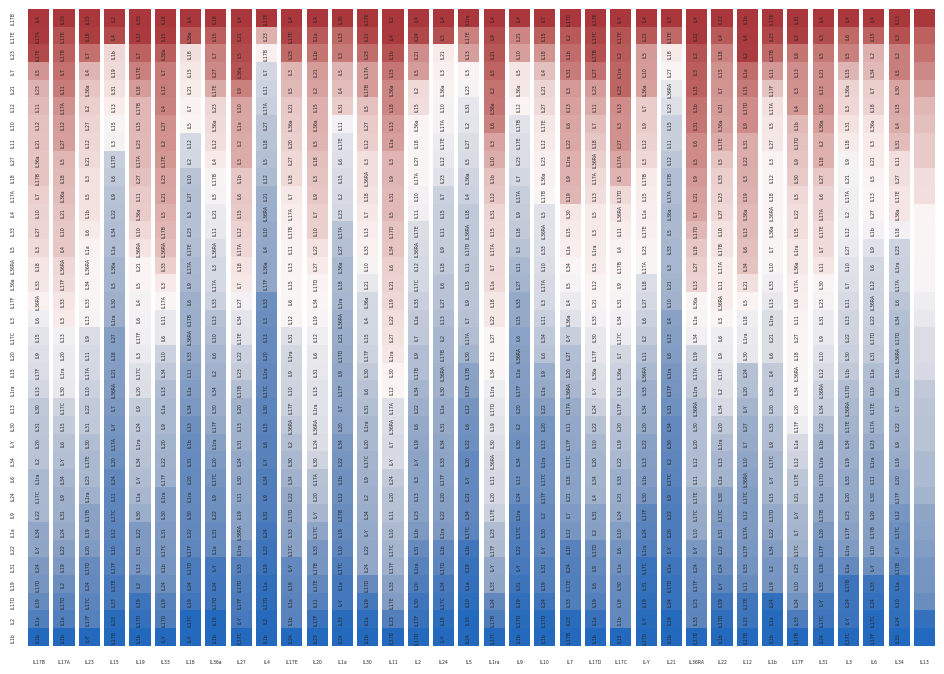

In [168]:
fig, axes  = plt.subplots(nrows=1, ncols=len(vec_sim_df_norm.columns))
#sns.set_context("paper", rc={"font.size":0.0005}) 
sns.set(font_scale=0.3)                                                 

for i, col in enumerate(vec_sim_df_norm.columns):
    sns.heatmap(
        data=pd.DataFrame(np.array(vec_sim_df_norm[col]).reshape(-1,1), index=vec_sim_df_norm.index, columns=[col]).sort_values(by=col, ascending=False),
        cmap="vlag",
        robust=True,
        ax=axes[i],
        cbar=False 
        )

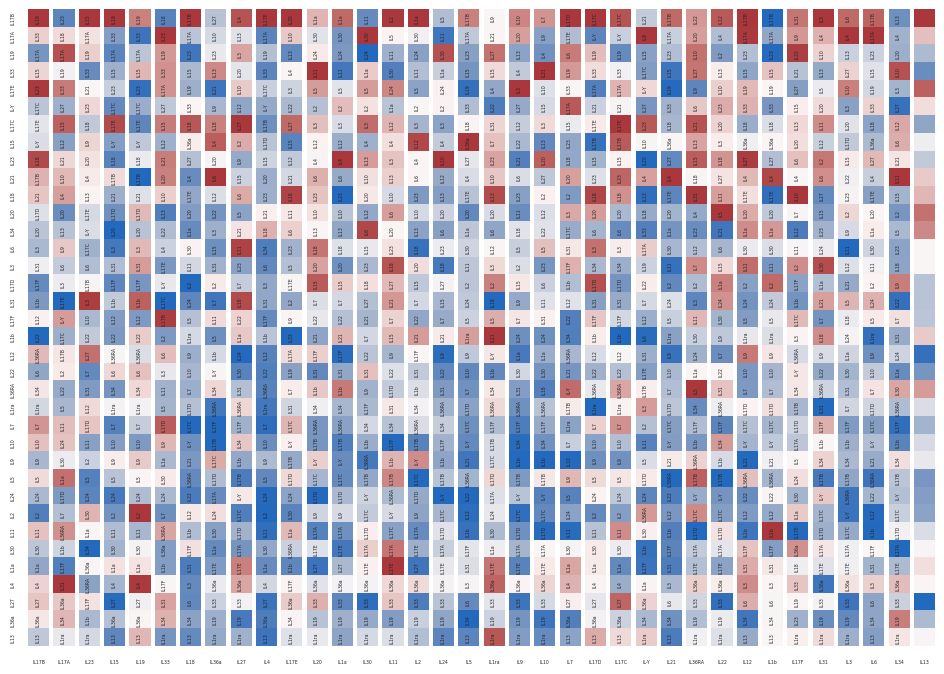

In [197]:
fig, axes  = plt.subplots(nrows=1, ncols=len(vec_sim_df_norm.columns))
#sns.set_context("paper", rc={"font.size":0.0005}) 
sns.set(font_scale=0.3)                                                 

for i, col in enumerate(vec_sim_df_norm.columns):
    col_df = pd.DataFrame(np.array(vec_sim_df_norm[col]).reshape(-1,1), index=vec_sim_df_norm.index, columns=[col])
    jaccard_sorted = pd.DataFrame(np.array(jaccard_similarities_norm[col]).reshape(-1,1), 
                                  index=jaccard_similarities_norm.index, 
                                  columns=[col]).sort_values(by=col, ascending=False)
    sns.heatmap(
        data = pd.DataFrame(np.array(col_df.loc[list(jaccard_sorted.index), col]).reshape(-1,1), 
                            index=jaccard_sorted.index, columns=[col]),
        cmap="vlag",
        robust=True,
        ax=axes[i],
        cbar=False 
        )